In [6]:
import numpy as np
import pandas as pd
from sklearn import tree

# abstract example, think points in 3D space
# The first three tuples are within a cube with corners 1,1,1 
# and last three tuples are within a cube with corners: 2,2,2  and  3,3,3

X = [ [0,0,0], [0,1,0], [1,1,0], [2,2,2], [3,3,2], [3,2,3] ]

Y = [0,0,0,1,1,1]    # classify the first three to be class "0" and the last three to be class "1"
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
print(type(clf))
print(clf)
foo = clf.predict_proba( [ [1,1,1], [0,1,1], [2,3,3], [3,3,3] ] )    # first two should be classified as 0, last two as 1
print("output of classifying 4 new items (should be 0,0,1,1): ")
print(foo)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
output of classifying 4 new items (should be 0,0,1,1): 
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [7]:


# Data and classifications here from Table 8.1 of the 3rd edition of Han, Kamber and Pei book

classifications = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]


t1 =  [1, 'youth','high','no','fair']  # class - 0, i.e. not buy
t2 =  [2, 'youth','high','no','excellent']  # class - 0
t3 =  [3, 'middle','high','no','fair']  # class 1, i.e. yes buy
t4 =  [4, 'senior','medium','no','fair']  # class - 1
t5 =  [5, 'senior','low','yes','fair']  # c 1
t6 =  [6, 'senior','low','yes','excellent']  # C 0
t7 =  [7, 'middle','low','yes','excellent']  # c 1
t8 =  [8, 'youth','medium','no','fair']  # c 0
t9 =  [9, 'youth','low','yes','fair']  # c 1
t10 = [10,'senior','medium','yes','fair']  # c 1
t11 = [11,'youth','medium','yes','excellent'] # c 1
t12 = [12,'middle','medium','no','excellent']  # c 1
t13 = [13,'middle','high','yes','fair']  # c 1
t14 = [14,'senior','medium','no','excellent']  # c 0

# with the ids removed and mapped to numeric values
# age: outh = 0, middle = 1, senior = 2
# income: low = 0, medium = 1, hight = 2
# student: no = 0, yes = 1
# credit: fair = 0, excellent = 2  # presumably there is a "good" in between...



nt1 =  [0,2,0,0]  # 0
nt2 =  [0,2,0,2]  # 0
nt3 =  [1,2,0,0]  # 1
nt4 =  [2,1,0,0]  # 1
nt5 =  [2,0,1,0]  # 1
nt6 =  [2,0,1,2]  # 0
nt7 =  [1,0,1,2]  # 1
nt8 =  [0,1,0,0]  # 0
nt9 =  [0,0,1,0]  # 1
nt10 = [2,1,1,0]  # 1
nt11 = [0,1,1,2]  # 1
nt12 = [1,1,0,2]  # 1
nt13 = [1,2,1,0]  # 1
nt14 = [2,1,0,2]  # 0

Xnum = []
Xnum.append(nt1)
Xnum.append(nt2)
Xnum.append(nt3)
Xnum.append(nt4)
Xnum.append(nt5)
Xnum.append(nt6)
Xnum.append(nt7)
Xnum.append(nt8)
Xnum.append(nt9)
Xnum.append(nt10)
Xnum.append(nt11)
Xnum.append(nt12)
Xnum.append(nt13)
Xnum.append(nt14)

print('Xnum = ')
print(Xnum)


# clf2 = tree.DecisionTreeClassifier()  # if not criterion supplied uses Gini
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(Xnum,classifications)

print(type(clf2))
print(clf2)

# Simple/silly test by looking up  the first 6 tuples
# since classifications = [0,0,1,1,1,0,1,0,1,1,1,1,1,0], predict should be 0,0,1,1,1,0
# i.e, by definition they should be classified correctly since used to build the tree!
print("\nNow 'predicting class' of the first 6 elements of the training data.")
testData = [ [0,2,0,0], [0,2,0,2], [1,2,0,0], [2,1,0,0], [2,0,1,0] , [2,0,1,2] ]
foo = clf2.predict_proba( testData )
print("test data = " + str(testData))
print("data are classified as:")
print(foo)

    



from sklearn.tree import export_text

# print out the text version of the tree structure
treeStruct = export_text(clf2)
print("\nNow printing export_text(clf2)")
print(treeStruct)



Xnum = 
[[0, 2, 0, 0], [0, 2, 0, 2], [1, 2, 0, 0], [2, 1, 0, 0], [2, 0, 1, 0], [2, 0, 1, 2], [1, 0, 1, 2], [0, 1, 0, 0], [0, 0, 1, 0], [2, 1, 1, 0], [0, 1, 1, 2], [1, 1, 0, 2], [1, 2, 1, 0], [2, 1, 0, 2]]
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now 'predicting class' of the first 6 elements of the training data.
test data = [[0, 2, 0, 0], [0, 2, 0, 2], [1, 2, 0, 0], [2, 1, 0, 0], [2, 0, 1, 0], [2, 0, 1, 2]]
data are classified as:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

Now printing export_text(clf2)
|--- feature_2 <= 0.50
|   |--- 

clf2.apply( Xnum ):
[ 2  2  4  6 11 12  9  2  9 11  9  4  9  7]

Now printing each tuple with the decision tree node it ends up in:
[0, 2, 0, 0],2
[0, 2, 0, 2],2
[1, 2, 0, 0],4
[2, 1, 0, 0],6
[2, 0, 1, 0],11
[2, 0, 1, 2],12
[1, 0, 1, 2],9
[0, 1, 0, 0],2
[0, 0, 1, 0],9
[2, 1, 1, 0],11
[0, 1, 1, 2],9
[1, 1, 0, 2],4
[1, 2, 1, 0],9
[2, 1, 0, 2],7


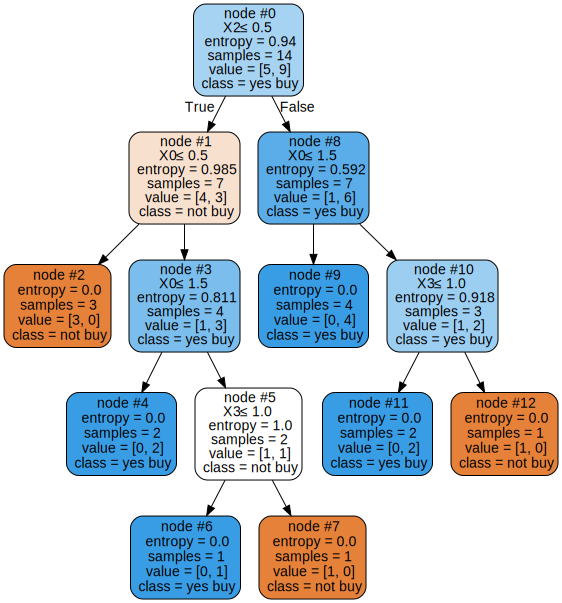

In [8]:
# which leaf level nodes did the tuples get assigned to
      
foo = clf2.apply( Xnum )   # passing in full list of training tuples
print("clf2.apply( Xnum ):") 
print(foo)
# now print out line by line as pair:  tuple, which leaf node 
print("\nNow printing each tuple with the decision tree node it ends up in:")
for i in range(len(foo)):
    print(str(Xnum[i]) + "," + str(foo[i])) 


# likely need to install first:
# pip install graphviz
# https://graphviz.readthedocs.io/en/stable/manual.html

from sklearn.tree import export_graphviz
import graphviz
# NOTE - adding in node_ids and class_names as options to make tree viz more robust
dot_data = tree.export_graphviz(clf2, node_ids="true",class_names=('not buy','yes buy'),out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph

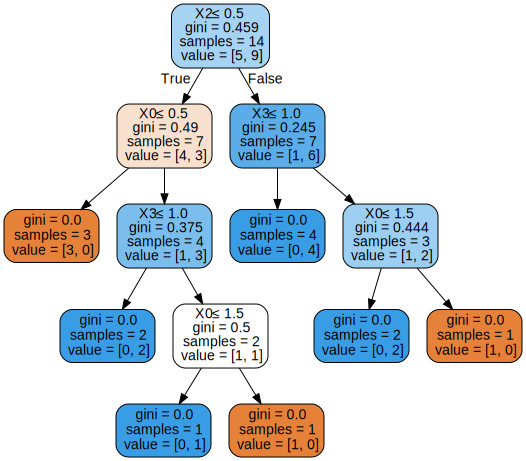

In [5]:
# create a new tree with "gini" instead of entropy, note, default is gini

# clf3 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,splitter="random")
clf3 = tree.DecisionTreeClassifier(criterion="gini")
clf3 = clf3.fit(Xnum,classifications)
dotData3 = tree.export_graphviz(clf3, out_file=None, filled=True, rounded=True, special_characters=True)
foo = clf3.predict_proba( Xnum )

graph = graphviz.Source(dotData3)
graph



X = 
[[30, 0, 0], [25, 3, 1], [32, 1, 1], [20, 2, 1], [40, 3, 0], [25, 3, 0], [24, 0, 0], [35, 3, 1], [41, 2, 0]]
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[0. 1.]
 [0. 1.]
 [0. 1.]]


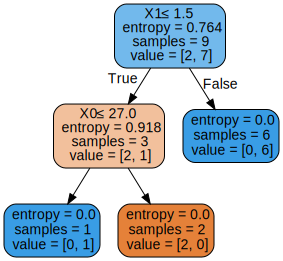

In [9]:

# new example -> PREDICT how people vote!

import numpy as np
import pandas as pd
from sklearn import tree


# feature vector = age, education level (0, 1, 2, 3 where 1 == HS, 2 == some college, 3 == bachelors+), pro-choice (0 means no, 1 means yes)
t1 = [30,0,0]
t2 = [25,3,1]
t3 = [32,1,1]
t4 = [20,2,1]
t5 = [40,3,0]
t6 = [25,3,0]
t7 = [24,0,0]
t8 = [35,3,1]
t9 = [41,2,0]

# make it so all people who are pro choice vote for candidate B
classifications = [0,1,1,1,0,0,0,1,0]   # 0 means candidate A(0), 1 means voting for candidate B(1)

# make it so all people who are >= 30 and have no college (eduction < 2) vote candidate A, other others B
classifications = [0,1,0,1,1,1,1,1,1]    # 0 means candidate A(0), 1 means voting for candidate B(1)

X = []
X.append(t1)
X.append(t2)
X.append(t3)
X.append(t4)
X.append(t5)
X.append(t6)
X.append(t7)
X.append(t8)
X.append(t9)


print('X = ')
print(X)

clf5 = tree.DecisionTreeClassifier(criterion="entropy")
clf5 = clf5.fit(X,classifications)

print(type(clf))
print(clf)

testData = [ [35,3,0], [22,1,0], [44,3,1]  ]
foo = clf5.predict_proba( testData )
print(foo)



import graphviz
from sklearn.tree import export_graphviz

dotData5 = tree.export_graphviz(clf5, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dotData5)
graph





